## Titanic Challenge Assignment
https://www.kaggle.com/c/titanic

In this assignment, I try to preprocess the titanic data, create Decision Tree and Random Forest models and fine tune them.

In [3]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Import the train and test data
train_data = pd.read_csv("./data/train.csv")
test_data = pd.read_csv("./data/test.csv")

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Let's try to understand our data a bit

##### Data Dictionary
|Feature| Definition| Key|
| --- | --- | --- |
|survival|Survival|0 = No, 1 = Yes|
|pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|Sex|
|Age|Age in years|
|sibsp|# of siblings / spouses aboard the Titanic|
|parch|# of parents / children aboard the Titanic|
|ticket|Ticket number|
|fare|Passenger fare|
|cabin|Cabin number|
|embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Task 1: Data Preprocessing
#### Working on Age column
Checking the distibution of our Age values

In [6]:
# value_counts as dataframe
df_age = train_data["Age"].value_counts()
df_age

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

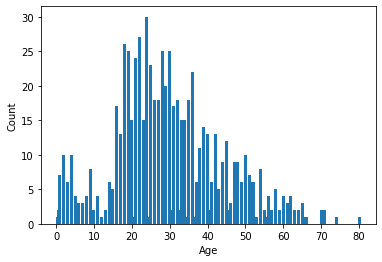

In [7]:
# Plotting the age column
x = df_age.index
y = df_age.to_numpy()

plt.bar(x, y)
plt.xlabel("Age")
plt.ylabel("Count");

In [8]:
train_data["Age"].mean()

29.69911764705882

We can fill the NA values in Age column with the mean data.. 
As the overall distribution is normal, this seems a valid substitution..

In [9]:
train_data["Age"].fillna(train_data["Age"].mean(), inplace=True)
train_data["Age"].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

#### Working on Embarked port column
Let's check the value counts for each port

In [10]:
train_data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

**Replace null values with most frequent embarked port i.e S**

In [11]:
train_data["Embarked"].fillna("S", inplace=True)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Working on Cabin column
Let's check value counts

In [12]:
train_data["Cabin"].value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
C22 C26        3
E101           3
              ..
B4             1
E77            1
A7             1
A23            1
A36            1
Name: Cabin, Length: 147, dtype: int64

We can just drop this column later as there are too many missing values

#### Convert categorical data to numeric data
Scikit learn Decision Tree implementation cannot handle categorical values out of the box, hence we need to encode categorical values to numeric values

In [13]:
print(train_data["Sex"].value_counts())
print(train_data["Embarked"].value_counts())

male      577
female    314
Name: Sex, dtype: int64
S    646
C    168
Q     77
Name: Embarked, dtype: int64


In [14]:
def convert_age(x):
    return x=="male"
def convert_embarked(x):
    embarked = {"S":2, "C":1, "Q":0}
    return embarked[x]

train_data["Sex"] = train_data["Sex"].apply(lambda x: convert_age(x))
train_data["Embarked"] = train_data["Embarked"].apply(lambda x: convert_embarked(x))

In [15]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",True,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",False,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",False,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",False,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",True,35.0,0,0,373450,8.0500,NaN,2


## Task 2: Feature Selection

In [16]:
train_data.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.033207,-0.057527,-0.001652,0.012658,0.030467
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.106811
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,-0.045702
Sex,0.042939,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.116569
Age,0.033207,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.007461
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.059961
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.078665
Fare,0.012658,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.062142
Embarked,0.030467,-0.106811,-0.045702,0.116569,-0.007461,0.059961,0.078665,-0.062142,1.000000


- Dropping columns **PassengerId, Name** as they do not really provide any useful information when correlated with survival column.
- Dropping column **Cabin** as >50% of the values are null.
- We can also drop the **Ticket** columnas the information can be understood in the fare column.

In [17]:
train_df = train_data.drop(columns=["PassengerId", "Name", "Cabin", "Ticket"])
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,True,22.0,1,0,7.2500,2
1,1,1,False,38.0,1,0,71.2833,1
2,1,3,False,26.0,0,0,7.9250,2
3,1,1,False,35.0,1,0,53.1000,2
4,0,3,True,35.0,0,0,8.0500,2


In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    bool   
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: bool(1), float64(2), int64(5)
memory usage: 49.7 KB


### Model selection and training

Split data into x and y

In [19]:
X = train_df.drop(columns=["Survived"])
y = train_df["Survived"]

Split data in train and validation set

In [20]:
from sklearn.model_selection import train_test_split

# for reproducible results
np.random.seed(24)

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)

In [21]:
from sklearn.tree import DecisionTreeClassifier

np.random.seed(24)

# fit a classifier with default paramters
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(train_X, train_y)

# evaluate a classifier
print("Train Acurracy of DT with default parameters: ", round(dt_classifier.score(train_X, train_y)*100, 2))
print("Test Accuracy of DT with default parameters: ", round(dt_classifier.score(test_X, test_y)*100, 2))

Train Acurracy of DT with default parameters:  98.46
Test Accuracy of DT with default parameters:  75.98


In [22]:
dt_classifier.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [23]:
## Fine tunning the parameters
from sklearn.model_selection import GridSearchCV

np.random.seed(24)

# parameters dictionary to searh on
parameters = {'criterion':["gini", "entropy"],
              'max_depth':np.linspace(1,30,30),
              'max_features':['sqrt','log2',0.65, 0.75, 0.85, None]}

# fit a classifier
# random_state for reproducible results in GridSearchCV
dt_classifier = DecisionTreeClassifier(random_state=2)
gscv = GridSearchCV(estimator=dt_classifier, param_grid=parameters, n_jobs=-1)
gscv.fit(train_X, train_y)

# model evaluation scores
print("Cross-validated score: ", round(gscv.best_score_ * 100, 2))
print("Best parameters:", gscv.best_params_)
print("Best estimator: ", gscv.best_estimator_)

Cross-validated score:  81.88
Best parameters: {'criterion': 'entropy', 'max_depth': 4.0, 'max_features': None}
Best estimator:  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4.0, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2, splitter='best')


In [24]:
# Fine tunned model
dt_model = gscv.best_estimator_

np.random.seed(24)
print("Train Acurracy of DT with best parameters: ", round(dt_model.score(train_X, train_y)*100,2))
print("Test Accuracy of DT with best parameters: ", round(dt_model.score(test_X, test_y)*100, 2))

Train Acurracy of DT with best parameters:  83.29
Test Accuracy of DT with best parameters:  82.12


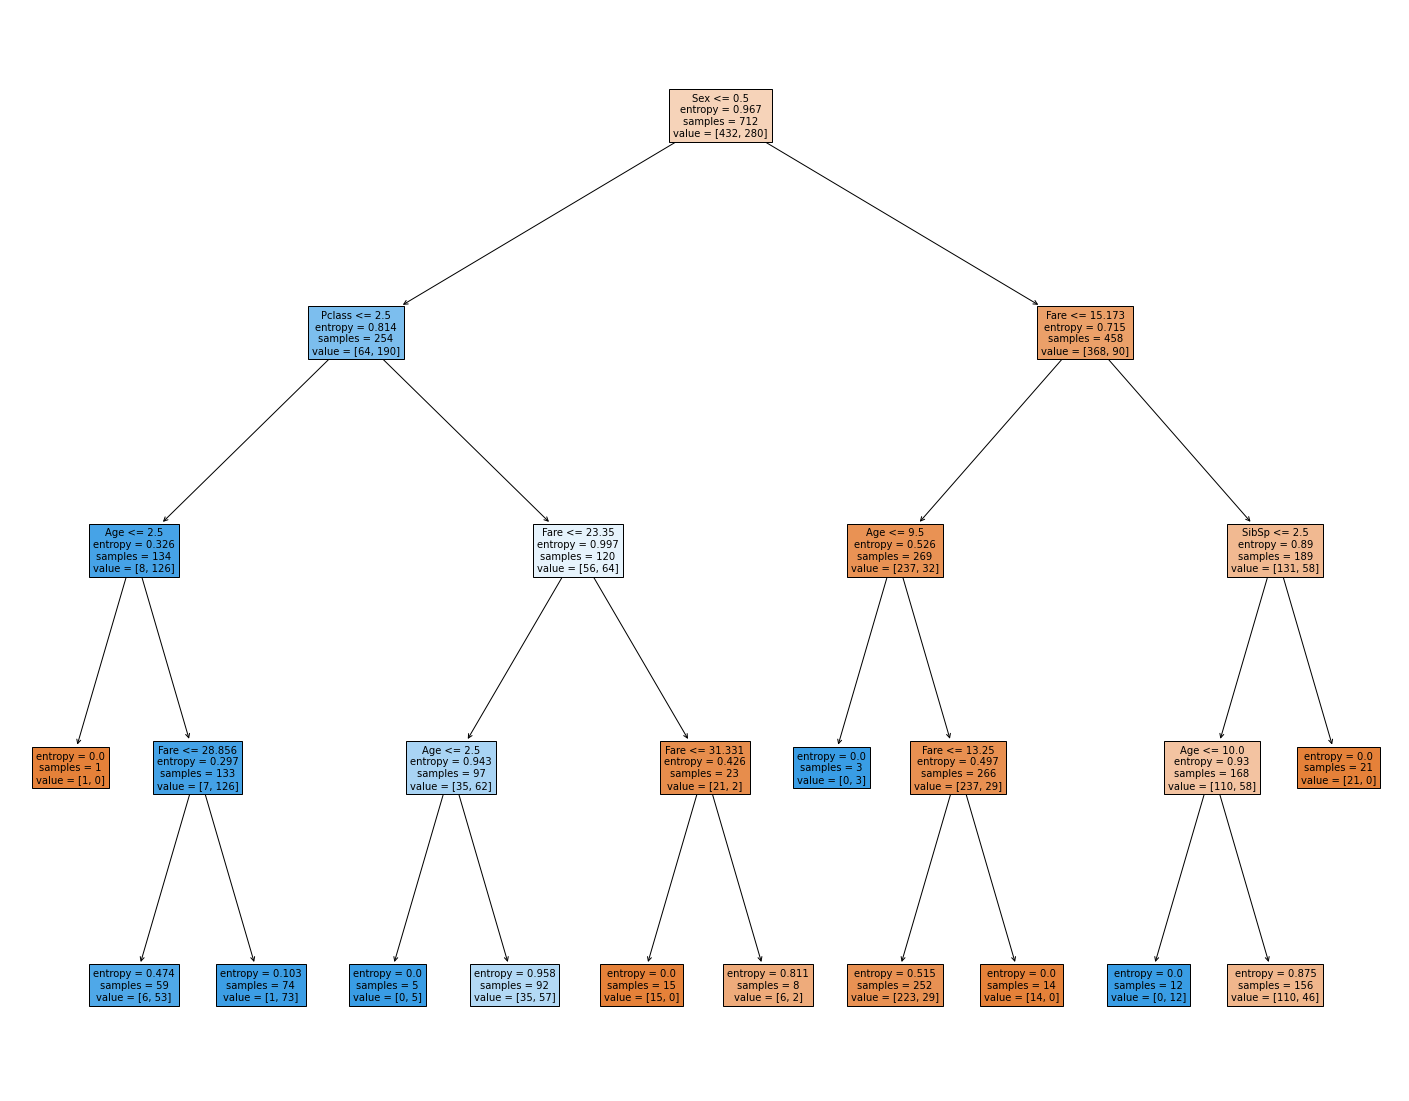

In [25]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(25,20))
plot_tree(dt_model, feature_names=train_X.columns, filled=True, fontsize=10);
fig.savefig('Fine tunned DT on titanic.png')

In [26]:
from sklearn.model_selection import cross_val_score
np.random.seed(24)

# 5 fold cross validation score
scores = cross_val_score(dt_model, X, y, cv=5)
print("Acurracy of DT : ", round(np.mean(scores)*100, 2))
print("Cross Validation scores: ", [round(score*100, 2) for score in scores])


Acurracy of DT :  80.36
Cross Validation scores:  [76.54, 82.58, 80.34, 78.09, 84.27]


In [27]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(24)

# initialize your classifier
rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(train_X, train_y)

# evaluate a classifier using misclassification error
print("Train Acurracy of RF with default parameters: ", round(rf_classifier.score(train_X, train_y)*100, 2))
print("Test Accuracy of Rf with default parameters: ", round(rf_classifier.score(test_X, test_y)*100, 2))


Train Acurracy of RF with default parameters:  98.46
Test Accuracy of Rf with default parameters:  79.33


In [28]:
## Fine tunning the parameters
from sklearn.model_selection import GridSearchCV

np.random.seed(24)

# parameters dictionary to searh on
parameters = {'n_estimators':[10,100,250,500],
              'criterion':["gini", "entropy"],
              'max_depth':np.linspace(1,15,15),
              'max_features':[0.65, 0.80, None]}

# fit a classifier
# random_state for reproducible results in GridSearchCV
rf_classifier = RandomForestClassifier(random_state=2)
gscv = GridSearchCV(estimator=rf_classifier, param_grid=parameters, n_jobs=-1)
gscv.fit(train_X, train_y)

# model evaluation scores
print("Cross-validated score: ", round(gscv.best_score_ * 100, 2))
print("Best parameters:", gscv.best_params_)
print("Best estimator: ", gscv.best_estimator_)

Cross-validated score:  83.85
Best parameters: {'criterion': 'entropy', 'max_depth': 10.0, 'max_features': 0.65, 'n_estimators': 250}
Best estimator:  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10.0, max_features=0.65,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)


In [29]:
# Fine tunned model
rf_model = gscv.best_estimator_

np.random.seed(24)
print("Train Acurracy of DT with best parameters: ", round(rf_model.score(train_X, train_y)*100,2))
print("Test Accuracy of DT with best parameters: ", round(rf_model.score(test_X, test_y)*100, 2))

Train Acurracy of DT with best parameters:  94.24
Test Accuracy of DT with best parameters:  83.8


In [30]:
from sklearn.model_selection import cross_val_score
np.random.seed(24)

# 5 fold cross validation score
scores = cross_val_score(rf_model, X, y, cv=5)
print("Acurracy of RF : ", round(np.mean(scores)*100, 2))
print("Cross Validation scores: ", [round(score*100, 2) for score in scores])

Acurracy of RF :  83.5
Cross Validation scores:  [81.01, 82.02, 87.64, 81.46, 85.39]


#### SVM

In [31]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

np.random.seed(24)

svc_model = SVC(kernel='linear')

# 5 fold cross validation score
scores = cross_val_score(svc_model, X, y, cv=5)
print("Acurracy of SVC with linear kernel: ", round(np.mean(scores)*100, 2))
print("Cross Validation scores: ", [round(score*100, 2) for score in scores])

Acurracy of SVC with linear kernel:  78.79
Cross Validation scores:  [80.45, 80.9, 78.65, 75.28, 78.65]


In [32]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

np.random.seed(24)

svc_model = SVC(kernel='poly')

# 5 fold cross validation score
scores = cross_val_score(svc_model, X, y, cv=5)
print("Acurracy of SVC with quadratic kernel: ", round(np.mean(scores)*100, 2))
print("Cross Validation scores: ", [round(score*100, 2) for score in scores])

Acurracy of SVC with quadratic kernel:  65.1
Cross Validation scores:  [61.45, 67.42, 64.04, 64.61, 67.98]


In [33]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

np.random.seed(24)

svc_model = SVC(kernel='rbf')

# 5 fold cross validation score
scores = cross_val_score(svc_model, X, y, cv=5)
print("Acurracy of SVC with rbf kernel: ", round(np.mean(scores)*100, 2))
print("Cross Validation scores: ", [round(score*100, 2) for score in scores])

Acurracy of SVC with rbf kernel:  67.46
Cross Validation scores:  [59.22, 71.35, 69.1, 68.54, 69.1]
